In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

************
- **We have 1338 rows and 7 Columns**
***********

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
numerical_columns=df.select_dtypes(include="number").columns
print("numerical_columns")
print(numerical_columns)
print("=============================")
categorical_columns=df.select_dtypes(include="object").columns
print("categorical_columns")
print(categorical_columns)

numerical_columns
Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
categorical_columns
Index(['sex', 'smoker', 'region'], dtype='object')


************
- **we have 4 numerical columns and 3 categorical columns**
**********

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
df.describe(include=object).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


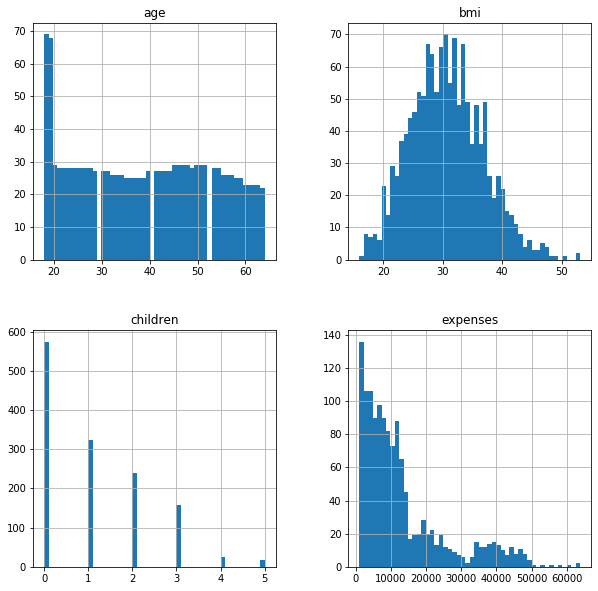

In [9]:
df.hist(bins=50,figsize=(10,10))
plt.show()

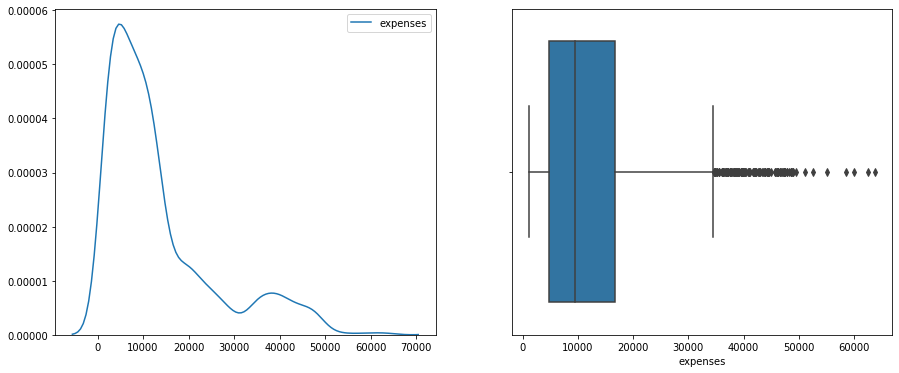

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2,1)
sns.kdeplot(df['expenses'])
plt.subplot(1,2,2)
sns.boxplot(df['expenses'])
plt.show()

In [11]:
from scipy.stats import kurtosis, skew, stats

In [12]:
print("skew of expenses:  {}".format(skew(df['expenses'])))
print("kurtosis of expenses:  {}".format(kurtosis(df['expenses'])))

skew of expenses:  1.5141797167430497
kurtosis of expenses:  1.5958213684180036


* The expenses variable is right skewed.
* Platykurtic
* Outliers are present, as we can observe in te above boxplot.

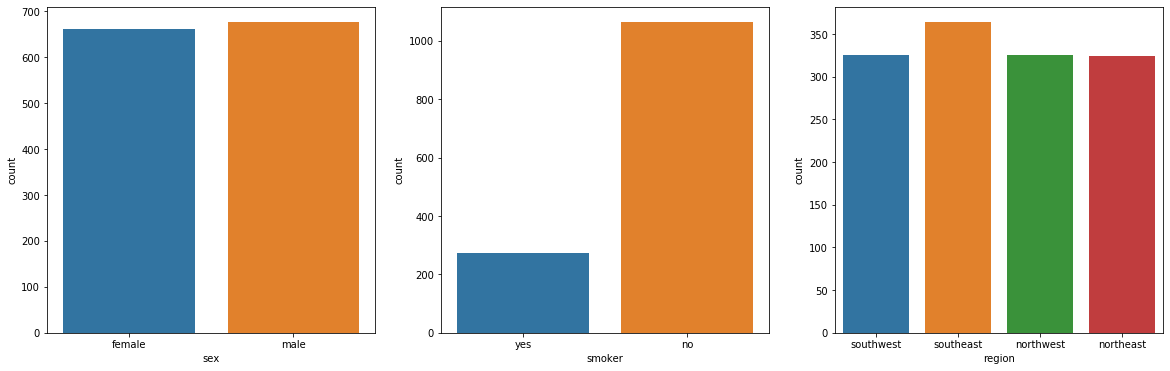

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.countplot(df.sex)
plt.subplot(1,3,2)
sns.countplot(df.smoker)
plt.subplot(1,3,3)
sns.countplot(df.region)
plt.show()

**************
* The count of female and male in te dataset is almost same.
* count of smoker is very less compared to non smoker.
* Southeast region has more number of observations , remaining three regions are almost same.
*******************

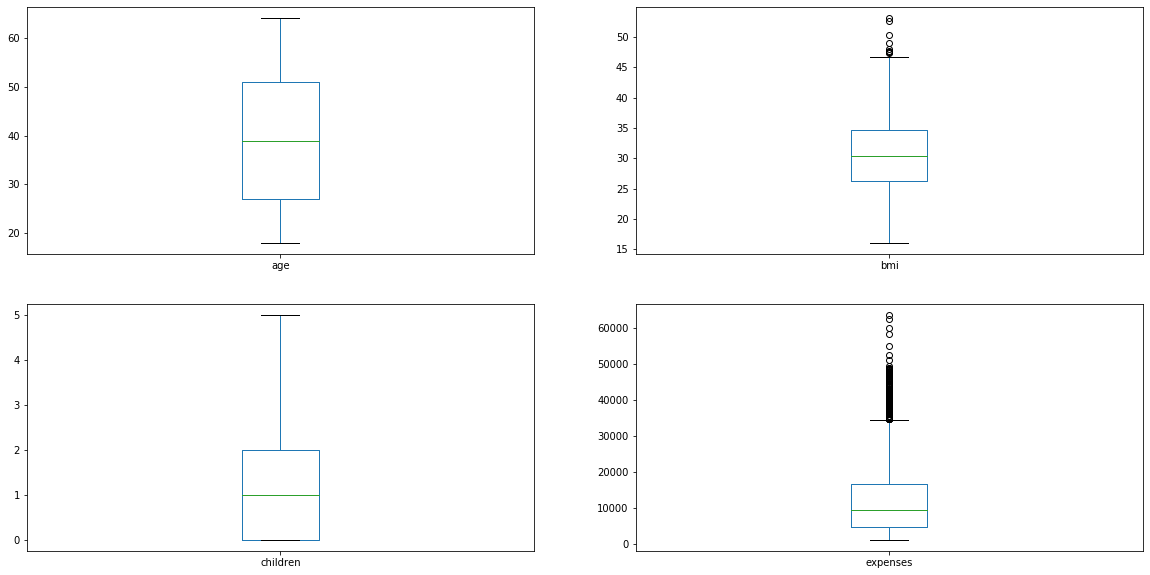

In [14]:
df.plot(kind="box",subplots=True,layout=(2,2),sharex=False,sharey=False,figsize=(20,10))
plt.show()

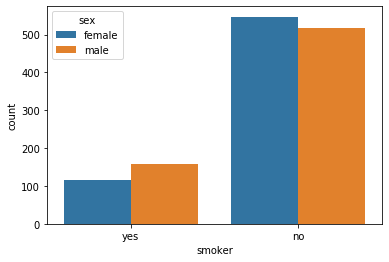

In [15]:
#sex and smoker
sns.countplot(df.smoker,hue=df.sex)

*************
* Percentage of male smoker is more than female.
************

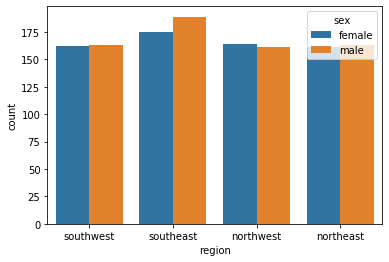

In [16]:
#sex and region
sns.countplot(df.region,hue=df.sex)

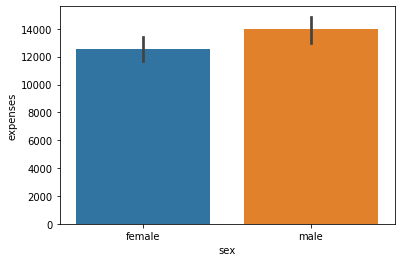

In [17]:
#sex and expenses
sns.barplot(df.sex,df.expenses)

In [18]:
df.groupby("sex").expenses.agg(["mean","median","count"])

,mean,median,count
sex,,,
female,12569.578897,9412.965,662
male,13956.751420,9369.615,676


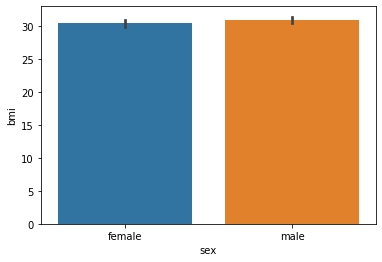

In [19]:
#sex and bmi
sns.barplot(df.sex,df.bmi)

In [20]:
df.groupby("sex").bmi.agg(["mean","median","count"])

,mean,median,count
sex,,,
female,30.379758,30.1,662
male,30.945266,30.7,676


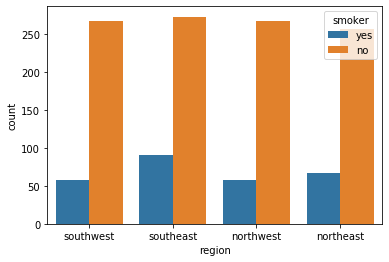

In [21]:
#smoker and region
sns.countplot(df.region,hue=df.smoker)

In [22]:
pd.crosstab(df.region,df.smoker)

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


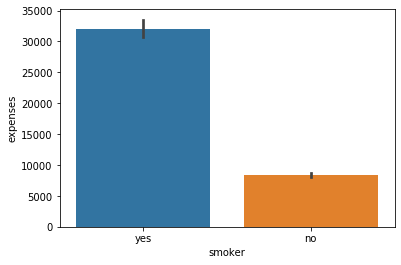

In [23]:
#smoker and expenses
sns.barplot(df.smoker,df.expenses)

In [24]:
df.groupby("smoker").expenses.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8434.268449,7345.405,1064
yes,32050.231971,34456.350,274


In [25]:
df.groupby("smoker").bmi.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,30.653195,30.35,1064
yes,30.713139,30.45,274


******
Expenses for smoker is high.
******

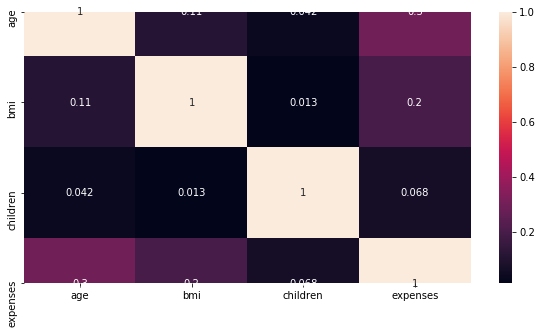

In [26]:
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(corr,annot=True)
plt.show()

In [27]:
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


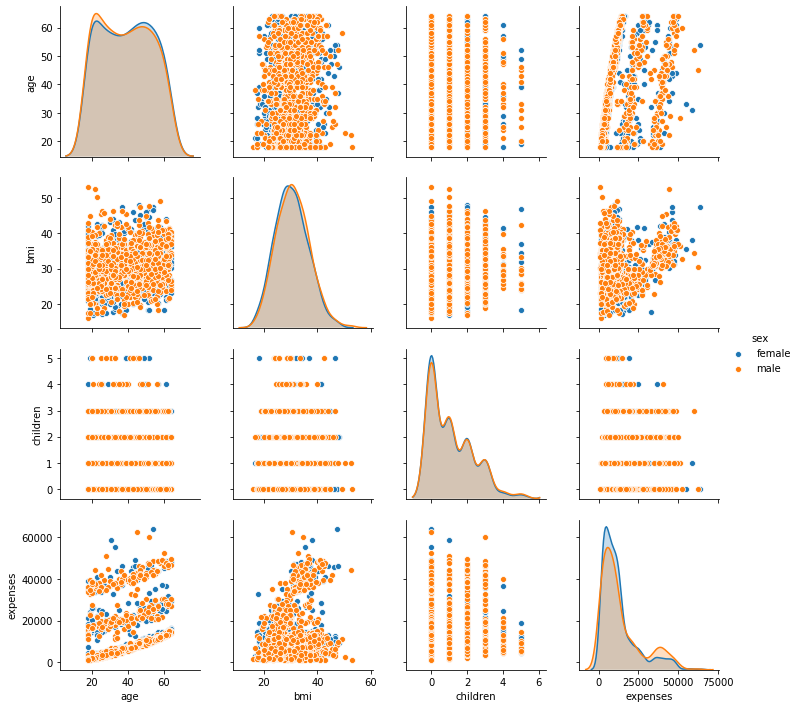

In [28]:
sns.pairplot(data=df,hue='sex')

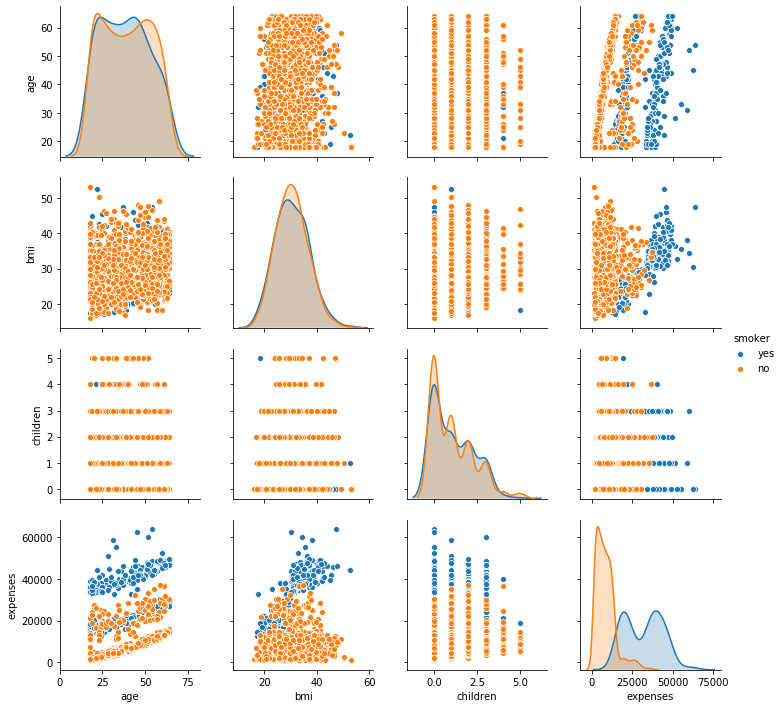

In [29]:
sns.pairplot(data=df,hue='smoker')

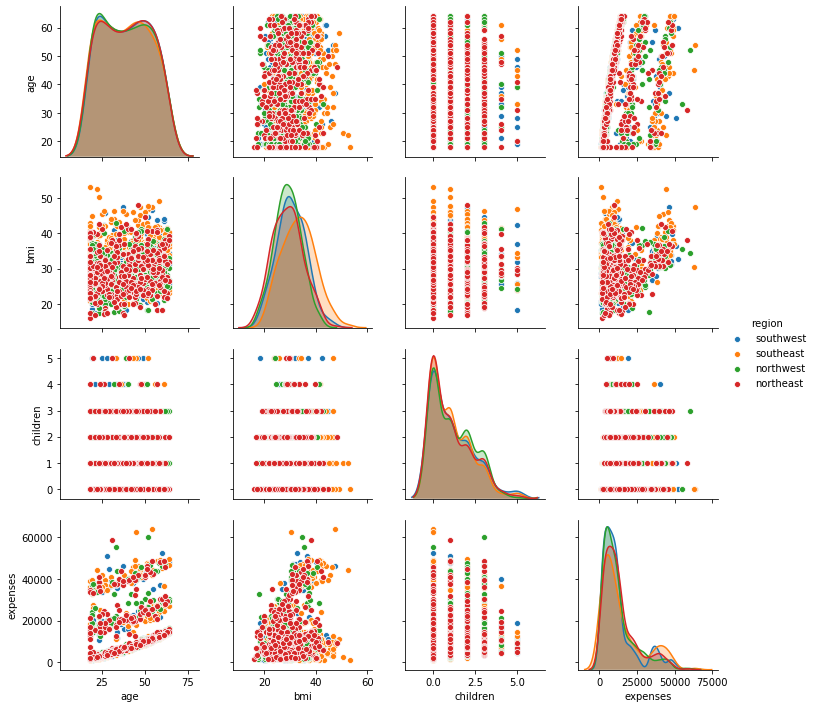

In [30]:
sns.pairplot(data=df,hue='region')

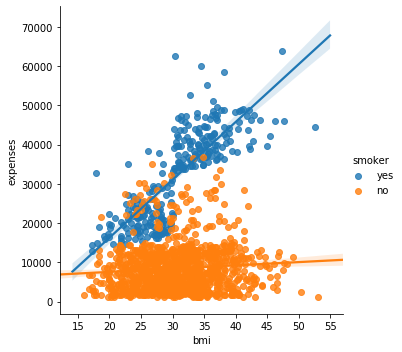

In [31]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

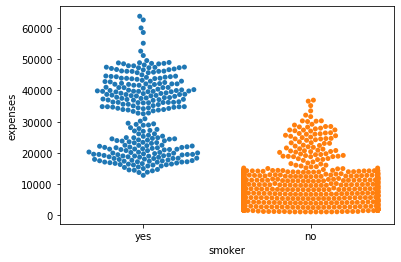

In [32]:
sns.swarmplot(x=df['smoker'],y=df['expenses'])

****************
The Swarm plot shows us that:Non-smokers are having less expenses than smokers.
hence form EDA we can infer that person who smoke must be charged more insurance premium.
****************


In [33]:
df_final=pd.get_dummies(df,drop_first=True)
df_final.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [34]:
X=df_final.drop("expenses",axis=1)
y=df_final.expenses

In [39]:
#ols model
import statsmodels.api as sm
X_c=sm.add_constant(X)
model_ols=sm.OLS(y,X_c).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:41:47   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.811  

In [40]:
#Backward Elimination (feature selection)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    X_c = sm.add_constant(X)
    model = sm.OLS(y,X_c).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

print(cols)

['age', 'bmi', 'children', 'smoker_yes']


In [41]:
X_final=X[cols]
X_final.head()

,age,bmi,children,smoker_yes
0,19,27.9,0,1
1,18,33.8,1,0
2,28,33.0,3,0
3,33,22.7,0,0
4,32,28.9,0,0


In [42]:
#with the above selected variables will create train test split and perform some machine learning algorithms
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y, test_size=0.3, random_state=100)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((936, 4), (402, 4), (936,), (402,))

In [53]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict,cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error 

In [56]:
def model_summary(model, model_name, cvn=5): 
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)

    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)
    score=cross_val_score(model,X,y,cv=cvn,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(score))
    bias=(np.mean(rmse))
    variance=((np.std(rmse,ddof=1)))
    print('variance error:',variance,'and bias error:', bias)

In [57]:
from sklearn.linear_model import LinearRegression  

linear_reg = LinearRegression()  
linear_reg.fit(X_train, y_train)  
model_summary(linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  0.735829524544407
Testing Accuracy:  0.7801310391427506
RMSE for Training Data:  6233.448267667036
RMSE for Testing Data:  5650.173986808004
Accuracy for 5 - Fold Cross Predicted:  0.7481542107186494
variance error: 213.3491534239878 and bias error: 6072.23253798324


In [58]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=100)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8726819614234532
Testing Accuracy:  0.8498327971783244
RMSE for Training Data:  4327.441347539493
RMSE for Testing Data:  4669.468015975861
Accuracy for 5 - Fold Cross Predicted:  0.8446164984592739
variance error: 447.9048151451111 and bias error: 4755.124001620495


In [59]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=100)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.8809957658785607
Testing Accuracy:  0.8811558767589107
RMSE for Training Data:  4183.766397210154
RMSE for Testing Data:  4154.021260252223
Accuracy for 5 - Fold Cross Predicted:  0.8572532629625136
variance error: 434.72889019017975 and bias error: 4557.259954736788


In [80]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': np.arange(1,10),
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(1,100)
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [81]:
grid_search.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16038 candidates, totalling 48114 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 461 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3053 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4833 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6941 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 12125 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 15201 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 18605 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 22159 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 24185 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 26371 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 28721 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 31231 tasks      | elap

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=2)

In [82]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 29}

In [88]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg_tunned = RandomForestRegressor(bootstrap = True,
 max_depth= 4,
 max_features= 3,
 min_samples_leaf = 5,
 min_samples_split = 8,
 n_estimators = 29)  
random_forest_reg_tunned.fit(X_train, y_train) 
model_summary(random_forest_reg_tunned, "Random_Forest_Regression_tunned")

Random_Forest_Regression_tunned
Training Accuracy:  0.8611507331728211
Testing Accuracy:  0.8908667329098378
RMSE for Training Data:  4519.163104546835
RMSE for Testing Data:  3980.6907329655387
Accuracy for 5 - Fold Cross Predicted:  0.8615489896201439
variance error: 377.0195587387464 and bias error: 4511.516879949051


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=29)
gb.fit(X_train, y_train) 
model_summary(gb, "gradient_boosting_regressor")

gradient_boosting_regressor
Training Accuracy:  0.8622300033911765
Testing Accuracy:  0.8888136203844987
RMSE for Training Data:  4501.565196984829
RMSE for Testing Data:  4017.960417370553
Accuracy for 5 - Fold Cross Predicted:  0.8594684575187125
variance error: 340.13048236074616 and bias error: 4527.954080542409


### Gradient Boosting regressor with n_estimator 29 gave us a good accuracy with comparitively less variance error.